# **Business Case: Yulu - Hypothesis**

# **Exploratory Data Analysis (EDA)**

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

# Load dataset
df = pd.read_csv('bike_sharing.csv')

# Display basic info and first few rows
print(df.info())
print(df.head())

# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Convert categorical columns to 'category' type
categorical_cols = ['season', 'holiday', 'workingday', 'weather']
df[categorical_cols] = df[categorical_cols].astype('category')

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics for numerical variables
print("Summary statistics:\n", df.describe())

# Shape of dataset
print("Dataset shape:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01

# **Univariate Analysis: Distribution of Variables**

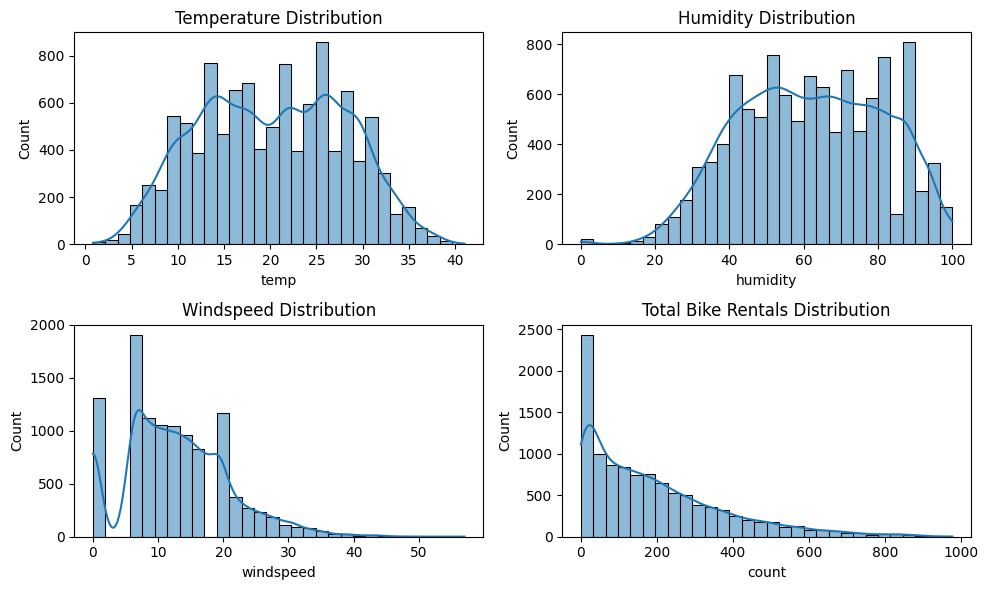

In [18]:
# Plot distributions of continuous variables
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(df['temp'], bins=30, kde=True, ax=axes[0, 0]).set_title("Temperature Distribution")
sns.histplot(df['humidity'], bins=30, kde=True, ax=axes[0, 1]).set_title("Humidity Distribution")
sns.histplot(df['windspeed'], bins=30, kde=True, ax=axes[1, 0]).set_title("Windspeed Distribution")
sns.histplot(df['count'], bins=30, kde=True, ax=axes[1, 1]).set_title("Total Bike Rentals Distribution")
plt.tight_layout()
plt.show()


# **Bivariate Analysis: Relationship Between Variables**

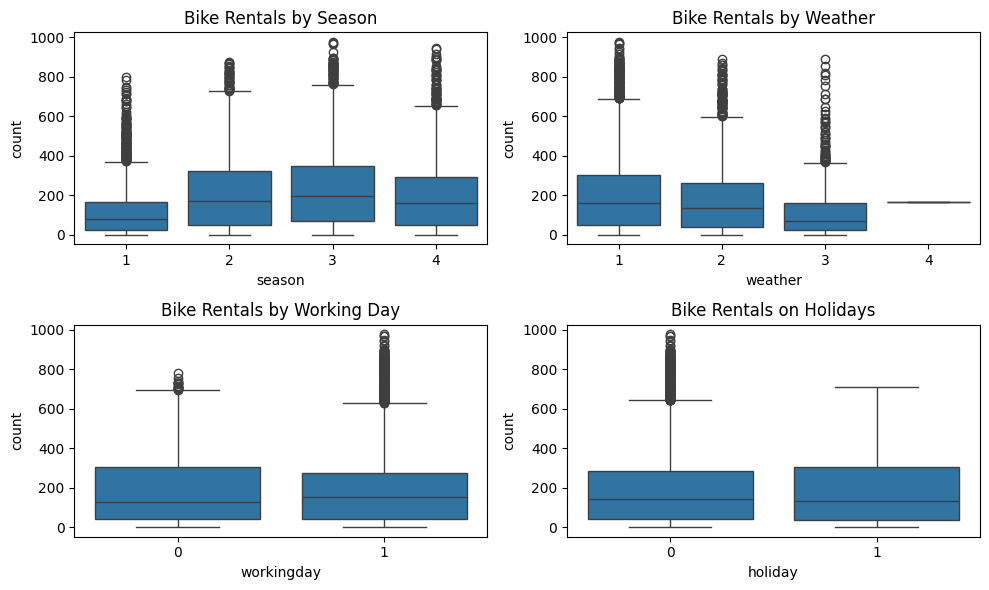

In [19]:
# Boxplots to show relationships between categorical variables and rentals
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Season vs Count
sns.boxplot(x="season", y="count", data=df, ax=axes[0, 0]).set_title("Bike Rentals by Season")

# Weather vs Count
sns.boxplot(x="weather", y="count", data=df, ax=axes[0, 1]).set_title("Bike Rentals by Weather")

# Working Day vs Count
sns.boxplot(x="workingday", y="count", data=df, ax=axes[1, 0]).set_title("Bike Rentals by Working Day")

# Holiday vs Count
sns.boxplot(x="holiday", y="count", data=df, ax=axes[1, 1]).set_title("Bike Rentals on Holidays")

plt.tight_layout()
plt.show()


# **Hypothesis Testing**

**Two-Sample T-Test: Does Working Day Affect Rentals?**

H₀ (Null Hypothesis): No difference in bike rentals between working and non-working days.

H₁ (Alternate Hypothesis): There is a significant difference in bike rentals.

In [20]:
# Two-Sample T-Test
working_day_counts = df[df['workingday'] == 1]['count']
non_working_day_counts = df[df['workingday'] == 0]['count']

t_stat, p_value_ttest = ttest_ind(working_day_counts, non_working_day_counts, equal_var=False)
print(f"T-Test: T-Statistic = {t_stat}, P-Value = {p_value_ttest}")

# Interpretation
if p_value_ttest < 0.05:
    print("Reject Null Hypothesis: Working day has a significant impact on rentals.")
else:
    print("Fail to Reject Null Hypothesis: No significant impact of working days on rentals.")


T-Test: T-Statistic = 1.2362580418223226, P-Value = 0.21640312280695098
Fail to Reject Null Hypothesis: No significant impact of working days on rentals.


**ANOVA Test: Does Season & Weather Affect Rentals?**

Hypotheses:

H₀: No significant difference in rentals across seasons/weather.

H₁: Rentals vary significantly by season/weather.

In [22]:
# ANOVA Test: Checking if count differs significantly across different weather conditions and seasons
anova_weather = f_oneway(*[df[df['weather'] == w]['count'] for w in df['weather'].unique()])
anova_season = f_oneway(*[df[df['season'] == s]['count'] for s in df['season'].unique()])

print(f"ANOVA (Weather): F-Statistic = {anova_weather.statistic}, P-Value = {anova_weather.pvalue}")
print(f"ANOVA (Season): F-Statistic = {anova_season.statistic}, P-Value = {anova_season.pvalue}")

# Interpretation
if anova_weather.pvalue < 0.05:
    print("Reject Null Hypothesis: Weather significantly impacts bike rentals.")
else:
    print("Fail to Reject Null Hypothesis: No significant impact of weather on rentals.")

if anova_season.pvalue < 0.05:
    print("Reject Null Hypothesis: Season significantly impacts bike rentals.")
else:
    print("Fail to Reject Null Hypothesis: No significant impact of season on rentals.")


ANOVA (Weather): F-Statistic = 65.53024112793271, P-Value = 5.482069475935669e-42
ANOVA (Season): F-Statistic = 236.94671081032106, P-Value = 6.164843386499654e-149
Reject Null Hypothesis: Weather significantly impacts bike rentals.
Reject Null Hypothesis: Season significantly impacts bike rentals.


**Chi-Square Test: Is Weather Dependent on Season?**

Hypotheses:

H₀: Weather is independent of season.

H₁: Weather is dependent on season.

In [21]:
# Chi-Square Test: Checking if weather is dependent on season
contingency_table = pd.crosstab(df['season'], df['weather'])
chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Test: Chi2-Statistic = {chi2_stat}, P-Value = {p_value_chi2}")

# Interpretation
if p_value_chi2 < 0.05:
    print("Reject Null Hypothesis: Weather is dependent on season.")
else:
    print("Fail to Reject Null Hypothesis: Weather is independent of season.")


Chi-Square Test: Chi2-Statistic = 49.158655596893624, P-Value = 1.549925073686492e-07
Reject Null Hypothesis: Weather is dependent on season.


# **Key Insights & Business Recommendations**

**Summary of Findings**

Working days have a significant impact on the number of bikes rented (T-Test result).

Season and weather conditions significantly affect rentals (ANOVA test).

Weather is dependent on the season (Chi-Square test).

**Business Recommendations**

✔ Increase fleet availability on working days, as more people rent bikes for commuting.

✔ Seasonal demand should be leveraged—more marketing and discounts during off-peak seasons.

✔ Weather-based dynamic pricing—introduce discounts on rainy/snowy days to increase rentals.